In [4]:
# filename:            /!\ modify if it is not in your "Downloads" folder
import os
root_folder = os.path.join(os.path.expanduser('~'), 'DATA','SST-Ketamine-vs-Saline')
filename = os.path.join(root_folder, 'Ketamine', '2023_01_19-15-04-51.nwb')

In [5]:
# general python modules for scientific analysis
import sys, pathlib, os
import numpy as np

from physion.utils import plot_tools as pt
from physion.analysis.read_NWB import Data, scan_folder_for_NWBfiles

In [6]:
data = Data(filename)

NWB-file reading time: 556.2ms


In [8]:
data.build_dFoF(verbose=False)

In [9]:
data.dFoF

array([[ 0.24881287,  0.7198114 ,  0.56765825, ...,  6.697544  ,
         6.5033236 ,  7.11749   ],
       [ 4.64088   ,  4.209919  ,  4.1136475 , ...,  1.9533869 ,
         2.4187393 ,  1.8833519 ],
       [ 0.21169505,  0.14290218,  0.16911021, ...,  1.1754345 ,
         1.1656005 ,  1.1175375 ],
       ...,
       [19.763842  , 18.048435  , 17.74418   , ...,  0.771698  ,
         1.5891099 ,  1.1853828 ],
       [ 0.09907496,  0.07626568, -0.15337048, ...,  6.290045  ,
         5.973787  ,  6.187024  ],
       [22.513165  , 21.563522  , 21.494267  , ...,  1.5221678 ,
         1.1063201 ,  1.4906942 ]], dtype=float32)

In [10]:
data.build_pupil_diameter()

(None,
 <Axes: title={'center': 'meanImg'}>,
 <matplotlib.image.AxesImage at 0x226f7f91190>)

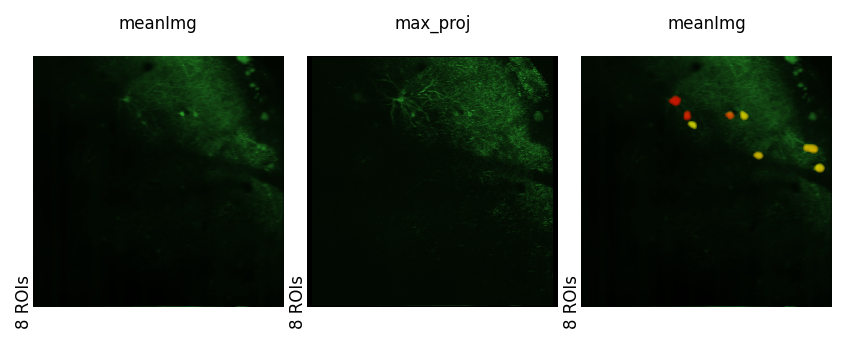

In [14]:
fig, AX = pt.figure(axes=(3,1), figsize=(1.4,3), wspace=0.15)

from physion.dataviz.imaging import show_CaImaging_FOV
#
show_CaImaging_FOV(data, key='meanImg', 
                   cmap=pt.get_linear_colormap('k', 'tab:green'),
                   NL=2, # non-linearity to normalize image
                   ax=AX[0])
show_CaImaging_FOV(data, key='max_proj', 
                   cmap=pt.get_linear_colormap('k', 'tab:green'),
                   NL=2, # non-linearity to normalize image
                   ax=AX[1])
show_CaImaging_FOV(data, key='meanImg', 
                   cmap=pt.get_linear_colormap('k', 'tab:green'),
                   NL=2,
                   roiIndices=range(data.nROIs), 
                   ax=AX[2])

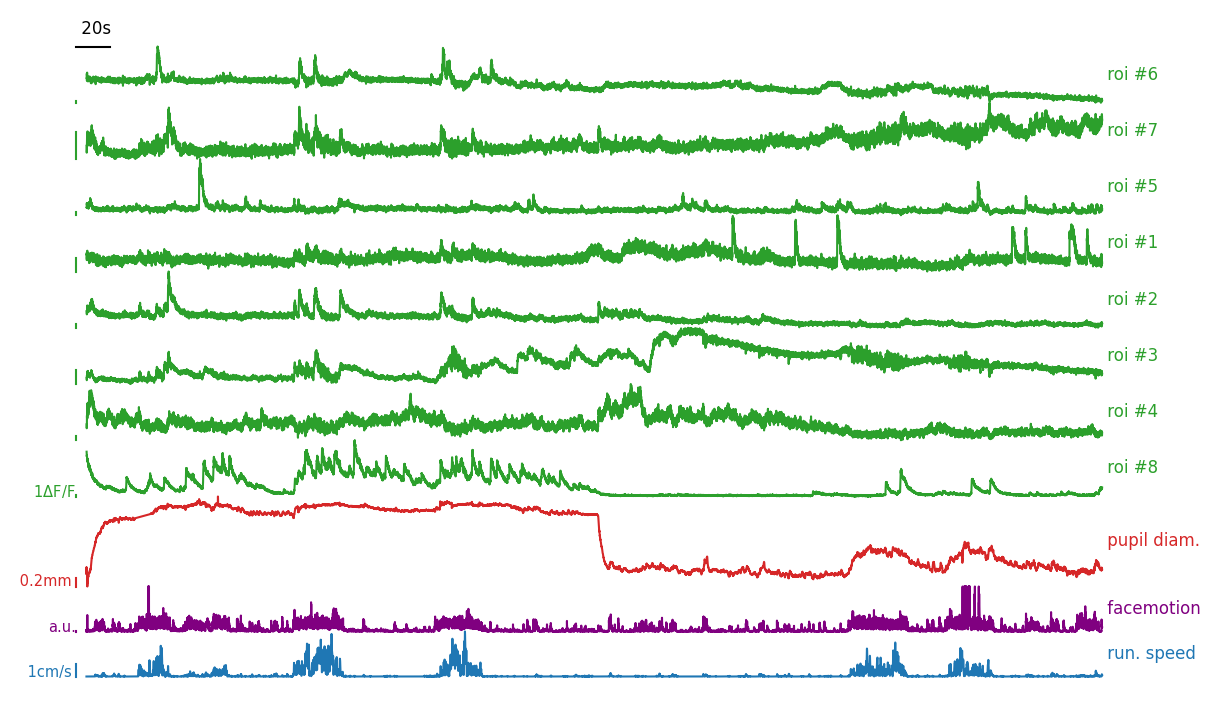

In [20]:
from physion.dataviz.raw import plot as plot_raw, find_default_plot_settings
settings = {'Locomotion': {'fig_fraction': 1,
                           'subsampling': 1,
                           'color': '#1f77b4'},
            'FaceMotion': {'fig_fraction': 1,
                           'subsampling': 1,
                           'color': 'purple'},
            'Pupil': {'fig_fraction': 2,
                      'subsampling': 1,
                      'color': '#d62728'},
             'CaImaging': {'fig_fraction': 10,
                           'subsampling': 1,
                           'subquantity': 'dF/F',
                           'roiIndices': np.random.choice(np.arange(data.nROIs), np.min([20,data.nROIs]), replace=False),
                           'color': '#2ca02c'}
           }
_ = plot_raw(data, settings=settings, tlim=[0,600])

In [49]:
data.build_pupil_diameter()
data.t_pupil[:]

array([-6.13378048e-01, -6.02390766e-01, -6.01393700e-01, ...,
        1.81605862e+03,  1.81609252e+03,  1.81612544e+03])

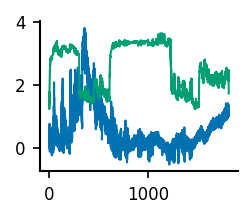

In [47]:
roiIndex =2
plt.plot(data.t_dFoF, data.dFoF[roiIndex,:])
plt.plot(data.t_pupil[:], data.pupil_diameter)